In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import yfinance as yf

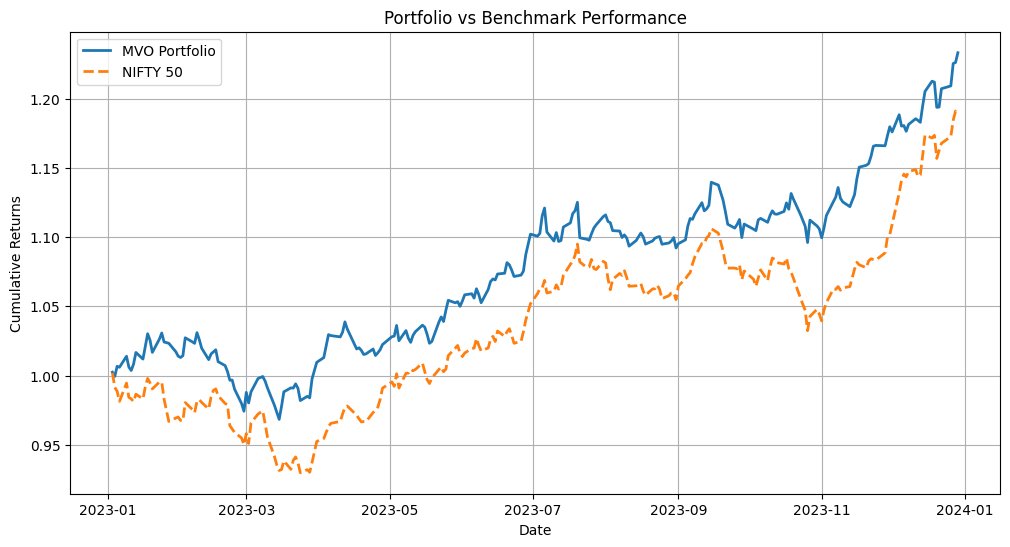

Annual Return: 23.69%
Annual Volatility: 9.91%
Sharpe Ratio: 1.68
Maximum Drawdown: -6.08%
Annual Return of NIFTY 50: 19.14%


In [2]:
returns = pd.read_csv("selected_stock_returns.csv", index_col=0, parse_dates=True)

# Load MVO optimized weights (Manually input or load from a file)
mvo_weights={
'BALKRISIND': 0.0264,
'BAJAJ-AUTO': 0.1736,
'HDFCBANK': 0.1366,
'HINDUNILVR': 0.2000,
'INFY': 0.0949,
'HCLTECH': 0.1051,
'ADANIENT': 0.0119,
'APLAPOLLO': 0.0515,
'ABBOTINDIA': 0.2000
}

# Convert to numpy array
weights = np.array(list(mvo_weights.values()))
stock_names = list(mvo_weights.keys())
stock_names = [s + '.NS' for s in stock_names]
# Ensure weights sum to 1
weights /= np.sum(weights)

# Compute Portfolio Returns
portfolio_returns = returns[stock_names].dot(weights)

# Compute Cumulative Returns
cumulative_returns = (1 + portfolio_returns).cumprod()

# Load Benchmark (NIFTY 50) Data
nifty_returns = pd.read_csv("nifty_returns.csv", index_col=0, parse_dates=True)
cumulative_nifty = (1 + nifty_returns['^NSEI']).cumprod()

total_period_years = (portfolio_returns.index[-1] - portfolio_returns.index[0]).days / 365

# Portfolio Performance Metrics
annual_return = (cumulative_returns.iloc[-1] ** (1 / total_period_years)) - 1
annual_volatility = portfolio_returns.std() * np.sqrt(252)
sharpe_ratio = (annual_return - 0.07) / annual_volatility  # Assuming 5% risk-free rate

# Maximum Drawdown Calculation
cumulative_max = cumulative_returns.cummax()
drawdown = (cumulative_returns - cumulative_max) / cumulative_max
max_drawdown = drawdown.min()

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns, label="MVO Portfolio", linewidth=2)
plt.plot(cumulative_nifty, label="NIFTY 50", linewidth=2, linestyle="--")
plt.title("Portfolio vs Benchmark Performance")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.grid()
plt.show()

nifty_portfolio_returns = nifty_returns['^NSEI']

# Compute NIFTY 50 Annual Return
nifty_annual_return = (cumulative_nifty.iloc[-1] ** (1 / total_period_years)) - 1

# Print Performance Metrics

print(f"Annual Return: {annual_return:.2%}")
print(f"Annual Volatility: {annual_volatility:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Maximum Drawdown: {max_drawdown:.2%}")

print(f"Annual Return of NIFTY 50: {nifty_annual_return:.2%}")
# Plot Pie Chart for Significant Stocks (Weights > 0.1)
def plot_significant_pie_chart(weights, stocks, title, threshold=0):
    significant_weights = [w for w in weights if w > threshold]
    significant_stocks = [stocks[i] for i, w in enumerate(weights) if w > threshold]

    plt.figure(figsize=(8, 8))
    plt.pie(significant_weights, labels=significant_stocks, autopct='%1.2f%%', startangle=140)
    plt.title(title)
    plt.axis('equal')
    plt.show()
